# 6.5 Machine learning clustering

In [1]:
# Importing the libraries that are going to be used and importing the DF
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl 

In [2]:
path = 'D:\Downloads\Data Analytics\TASK 6'

In [3]:
df = pd.read_csv(os.path.join(path,'df_clean4.csv'), index_col = False)

In [4]:
df

,id,model year,manufacturer,model,cylinders,fuel,price,mileage,car conditions,transmission,car type,car colour,state,Date posted,mileage category,price category
0,7308841185,1989,unknown,kenworth t-600,unknown,diesel,500,1111,parts only,manual,truck,white,North Carolina,18/04/2021,very low mileage,very cheap
1,7306992109,1994,chevrolet,unknown,8 cylinders,gas,500,1000,clean,manual,truck,red,Wisconsin,14/04/2021,very low mileage,very cheap
2,7302434257,1982,honda,cb750sc,4 cylinders,gas,500,1,clean,manual,other,unknown,Colorado,05/04/2021,new,very cheap
3,7313155712,1987,ford,thunderbird turbo coupe,6 cylinders,gas,500,0,parts only,automatic,coupe,black,California,26/04/2021,new,very cheap
4,7315266718,2016,gmc,yukon,8 cylinders,gas,501,70153,clean,automatic,SUV,unknown,California,01/05/2021,decent mileage,very cheap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294951,7314331466,2020,ferrari,f8 tributo,8 cylinders,gas,347999,3000,clean,automatic,coupe,unknown,California,29/04/2021,very low mileage,very expensive
294952,7306488355,2020,ferrari,f8 tributo,8 cylinders,gas,349999,2800,clean,automatic,coupe,unknown,California,13/04/2021,very low mileage,very expensive
294953,7303420900,2003,unknown,any and all,5 cylinders,diesel,400123,123321,clean,automatic,pickup,blue,Pennsylvania,07/04/2021,high mileage,very expensive
294954,7313051670,2016,unknown,Lambo Aventador SV Roadster,12 cylinders,gas,516999,9982,clean,automatic,convertible,white,Florida,26/04/2021,very low mileage,very expensive


In [5]:
# As we can see, there is plenty of categorical data, so we need to keep only the numerical one
df1 = df.drop(columns =['id','model','car conditions','car colour','cylinders','mileage category','price category','Date posted','manufacturer','fuel','transmission','car type','state'])

In [6]:
df1

,model year,price,mileage
0,1989,500,1111
1,1994,500,1000
2,1982,500,1
3,1987,500,0
4,2016,501,70153
...,...,...,...
294951,2020,347999,3000
294952,2020,349999,2800
294953,2003,400123,123321
294954,2016,516999,9982


### 6.5.3 Elbow technique 

In [11]:
# Stating by defining the range of the cluster
num_cl = range(1, 20) 
# Then, defining the k-means cluster in the above range.
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [12]:
# Now, create a score for each of the ranges created..
score = [kmeans[i].fit(df1).score(df1) for i in range(len(kmeans))] 

score

[-1218621104842269.8,
 -421248505146224.25,
 -230818241083275.8,
 -158169696260398.44,
 -123499901136780.53,
 -101441216252447.4,
 -88084782887234.28,
 -77741321282237.61,
 -68131970094549.125,
 -61444556489669.78,
 -56441104608224.98,
 -52196966678455.09,
 -48349285668879.91,
 -44859751791140.72,
 -41663502231156.76,
 -39098422987119.69,
 -36763289902810.83,
 -34502154976295.383,
 -32506997284902.387]

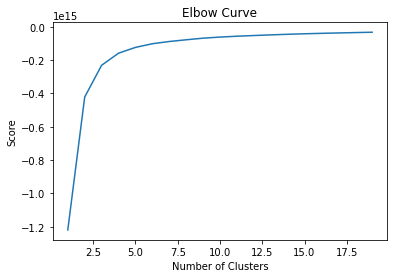

In [13]:
# And finally, create the elbow graph
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### 6.5.4 Number of clusters

As we can notice, we are getting a value of between 3 and 4 for the breaking point of the curve, meaning that we are going to have to use one of those values.
I have decided to go with 4 clusters in this case, as the DF has a lot of information, and the numerical variation even though not huge, is quite substancial do create more than 3 clusters.

### 6.5.5 K-means clustering

In [14]:
# First, create the object based on the n° of clusters
kmeans = KMeans(n_clusters = 4) 

In [15]:
# Then fit the K-mean into the DF
kmeans.fit(df1)

KMeans(n_clusters=4)

### 6.5.6 Attaching to the DF

In [16]:
df1['clusters'] = kmeans.fit_predict(df1)

In [17]:
df1.head()

,model year,price,mileage,clusters
0,1989,500,1111,0
1,1994,500,1000,0
2,1982,500,1,0
3,1987,500,0,0
4,2016,501,70153,3


In [18]:
# Verify if the clusters we correctly assigned with a general view
df1['clusters'].value_counts()

0    109662
3     90586
1     71174
2     23534
Name: clusters, dtype: int64

### 6.5.7 Ploting

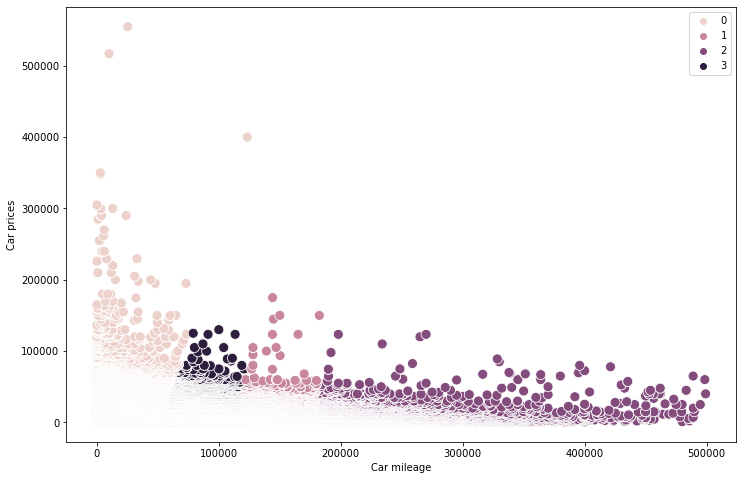

In [20]:
# And now plot it! First Mileage and price compared

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['mileage'], y=df1['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Car mileage') # Label x-axis.
plt.ylabel('Car prices') # Label y-axis.
plt.show()

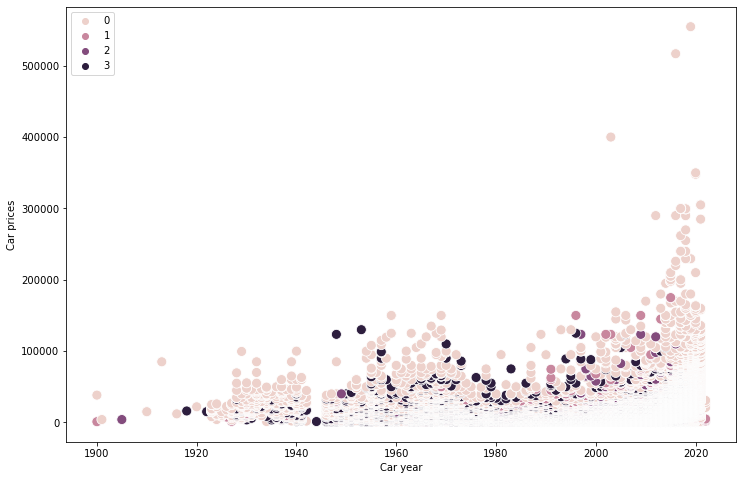

In [21]:
# Then, the car year and price.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['model year'], y=df1['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Car year') # Label x-axis.
plt.ylabel('Car prices') # Label y-axis.
plt.show()

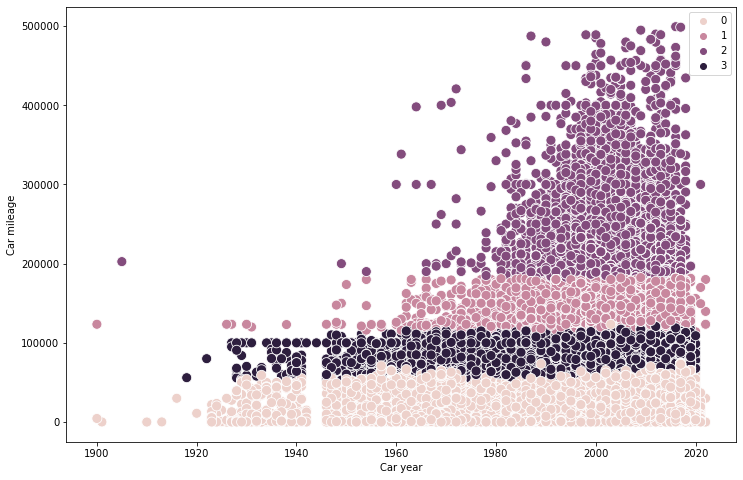

In [22]:
# Lastly the year and the mileage.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['model year'], y=df1['mileage'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Car year') # Label x-axis.
plt.ylabel('Car mileage') # Label y-axis.
plt.show()

### 6.5.8 Plot analysis 

All the clusters made sense on their own.

**Mileage & Price**: The first cluster (0) has lower mileage, but also a higher price, while the last cluster (3) has a bigger mileage and a lower price. This is a great division of the clusters as it divided them quite well across the mileage groups.

**Year & Prices**: They are all scrambled, which does make sense, as the value of car prices can't be dictated by the year alone, as there are classical cars that are extremely expensive based on their year, also new cars in different price categories, meaning that the year is not so relevant for the price, and hard to be grouped together.

**Mileage & Year**: This cluster made sense as well, even though it may have a few outliers. These outliers are all classic cars, so they all have very specific stories, some were running for a long time, while others may only be for collectors.
Interesting enough, it is really unlikely for cars released before the 60s to go over 200.000 miles, meaning that they either break or are kept as collection items and are no longer in active circulation.
So, up to +-50.000 miles, we can find the first cluster (0), then up to 100.000, the second cluster (1), from 100.000 to about 200.000 miles the third group (2), and lastly, the final cluster (3) with cars with more than 200.000 miles

### 6.5.9 Grouping

In [25]:
df1.groupby('clusters').agg({'model year':['mean', 'median'], 
                         'mileage':['mean', 'median'], 
                         'price':['mean', 'median']})

model year                mileage                   price         
                 mean  median           mean    median          mean   median
clusters                                                                     
0         2015.494365  2018.0   26384.046424   26128.5  30463.503274  28990.0
1         2008.667645  2010.0  143201.339253  141005.0  11334.092225   8499.0
2         2005.363134  2006.0  219299.889054  207056.0   8455.364111   5692.5
3         2011.336829  2013.0   85409.523171   85622.0  17798.755658  14998.0

### 6.5.10 Grouping analysis

The grouping of information, in this case, showed a few additional information, such as cluster 2, which contains cars that are old and with higher mileage, but also at a lower price. Then similar to cluster 2, cluster 1 contains cars with slightly lower mileage, but with the price being slightly higher, followed by cluster 3 and lastly the 0.

All this information can be compared in the future with nominal data, to better predict the market.